# Seed random dots on an SHP file

In this notebook we read an SHP file of the Campfire wildfire perimeter and we seed a number of points with a random location inside the SHP area

We first load useful libraries

In [2]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

We now read the SHP file as a geopandas

In [4]:
reader = r'../../DATA/Fire_Perimeter.shp' 
gdf_polys = gpd.read_file(reader)
gdf_polys

,id,geometry
0,None,"POLYGON ((-121.77337 39.72297, -121.77418 39.7..."


In [5]:
x_min, y_min, x_max, y_max = gdf_polys.total_bounds
gdf_polys.total_bounds

array([-121.77762215,   39.60192347, -121.42648978,   39.85986267])

In [7]:
n = 20

In [9]:
x = np.random.uniform(x_min, x_max, n)
y = np.random.uniform(y_min, y_max, n)

In [10]:
gdf_points = gpd.GeoSeries(gpd.points_from_xy(x, y))
gdf_points

0     POINT (-121.76974 39.81204)
1     POINT (-121.52959 39.80278)
2     POINT (-121.68215 39.82406)
3     POINT (-121.46955 39.66124)
4     POINT (-121.76966 39.65006)
5     POINT (-121.54360 39.70270)
6     POINT (-121.63943 39.84869)
7     POINT (-121.58639 39.78043)
8     POINT (-121.55192 39.60434)
9     POINT (-121.54336 39.62322)
10    POINT (-121.60719 39.85270)
11    POINT (-121.60668 39.70139)
12    POINT (-121.68489 39.83797)
13    POINT (-121.61410 39.80425)
14    POINT (-121.72964 39.65364)
15    POINT (-121.45397 39.80487)
16    POINT (-121.51333 39.67301)
17    POINT (-121.71045 39.63816)
18    POINT (-121.60801 39.72201)
19    POINT (-121.56960 39.69671)
dtype: geometry

In [11]:
gdf_points = gdf_points[gdf_points.within(gdf_polys.unary_union)]
gdf_points

1     POINT (-121.52959 39.80278)
5     POINT (-121.54360 39.70270)
7     POINT (-121.58639 39.78043)
11    POINT (-121.60668 39.70139)
13    POINT (-121.61410 39.80425)
14    POINT (-121.72964 39.65364)
15    POINT (-121.45397 39.80487)
17    POINT (-121.71045 39.63816)
18    POINT (-121.60801 39.72201)
dtype: geometry

We iterate over the polygons and extract the area

<AxesSubplot:>

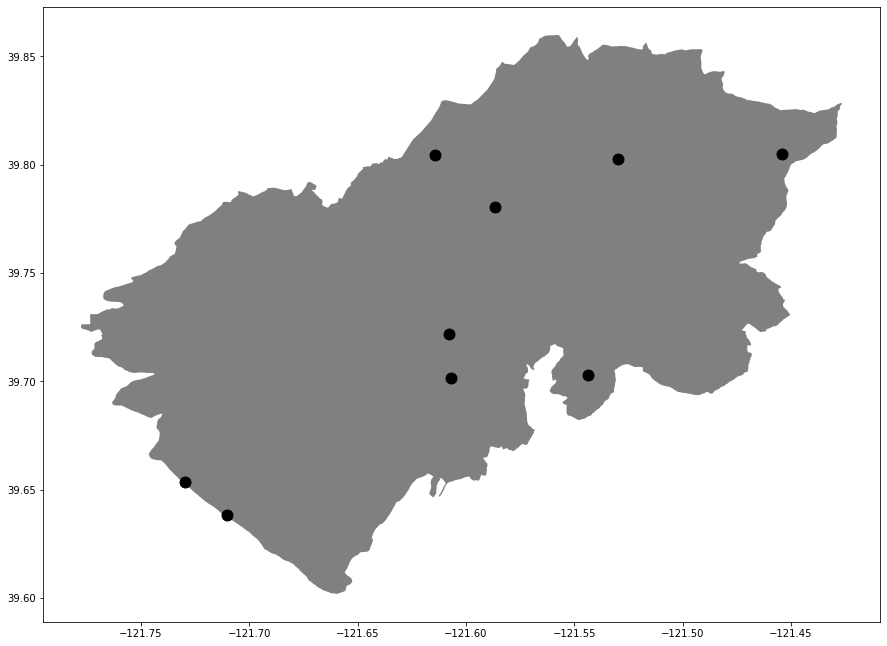

In [14]:
fig, ax = plt.subplots(figsize=(15, 15))
gdf_polys.plot(ax=ax, color='grey')
gdf_points.plot(ax=ax,color='k', markersize=120)